In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

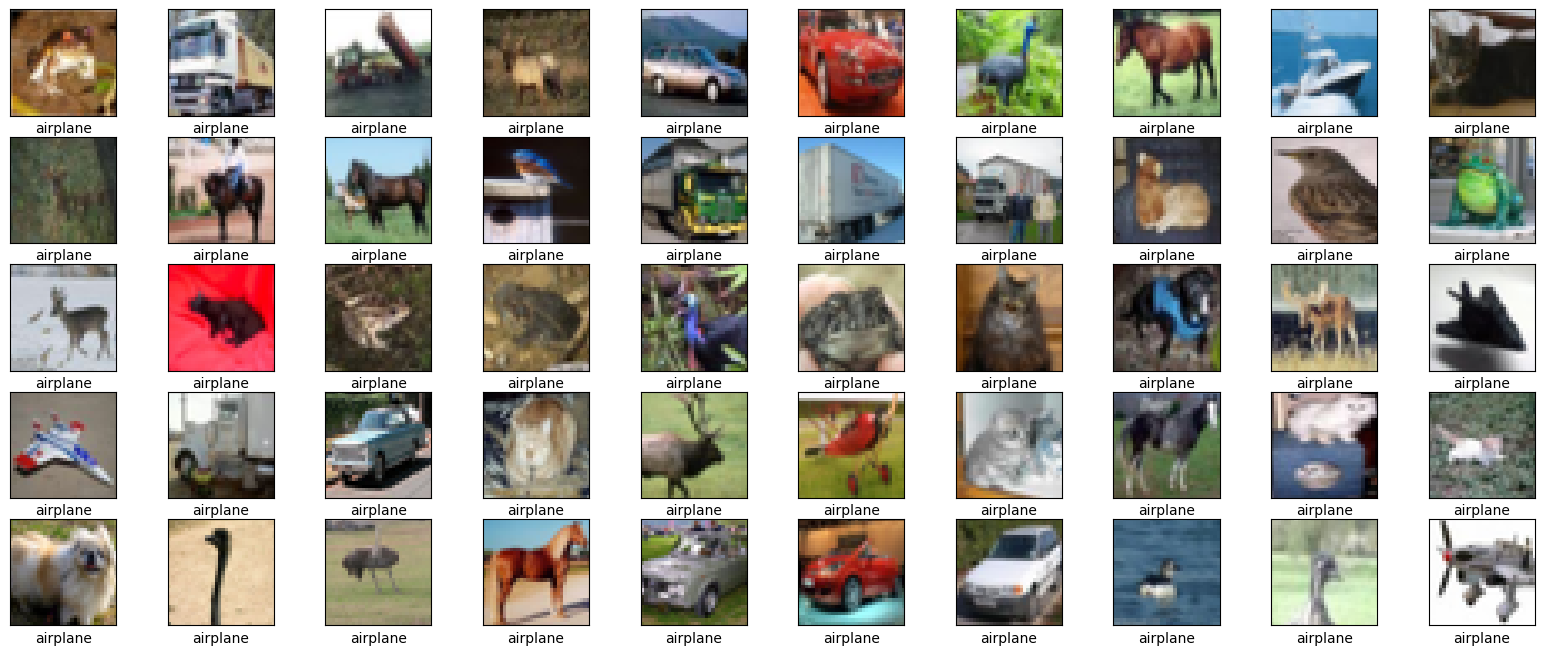

In [4]:
plt.figure(figsize=(20, 8))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[np.argmax(Y_train[i])])  # Use np.argmax to get the class index from one-hot encoding

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [7]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 11s 6ms/step - loss: 1.6857 - accuracy: 0.3852 - val_loss: 1.4578 - val_accuracy: 0.4873
Epoch 2/5
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3064 - accuracy: 0.5327 - val_loss: 1.2382 - val_accuracy: 0.5652
Epoch 3/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1366 - accuracy: 0.5998 - val_loss: 1.0924 - val_accuracy: 0.6171
Epoch 4/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0236 - accuracy: 0.6396 - val_loss: 1.0702 - val_accuracy: 0.6303
Epoch 5/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9312 - accuracy: 0.6733 - val_loss: 1.0135 - val_accuracy: 0.6538


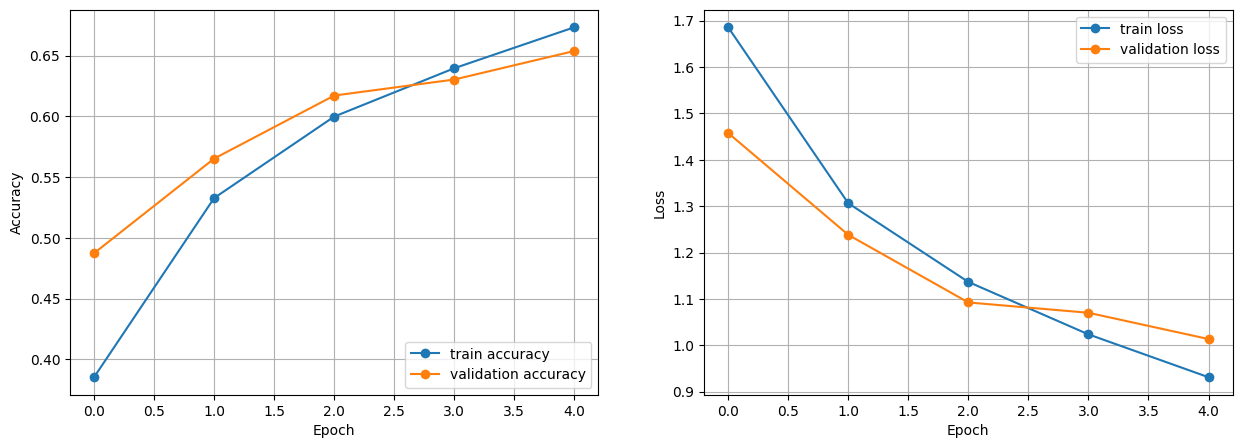

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.0363 - accuracy: 0.6439

Test Accuracy: 0.6438999772071838

Test Loss: 1.0362966060638428


In [11]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
predictions[0]

array([0.00426532, 0.00093081, 0.00188432, 0.5616288 , 0.00110234,
       0.40279523, 0.00396021, 0.00092061, 0.02066906, 0.00184318],
      dtype=float32)

In [13]:
np.argmax(predictions[0])

3

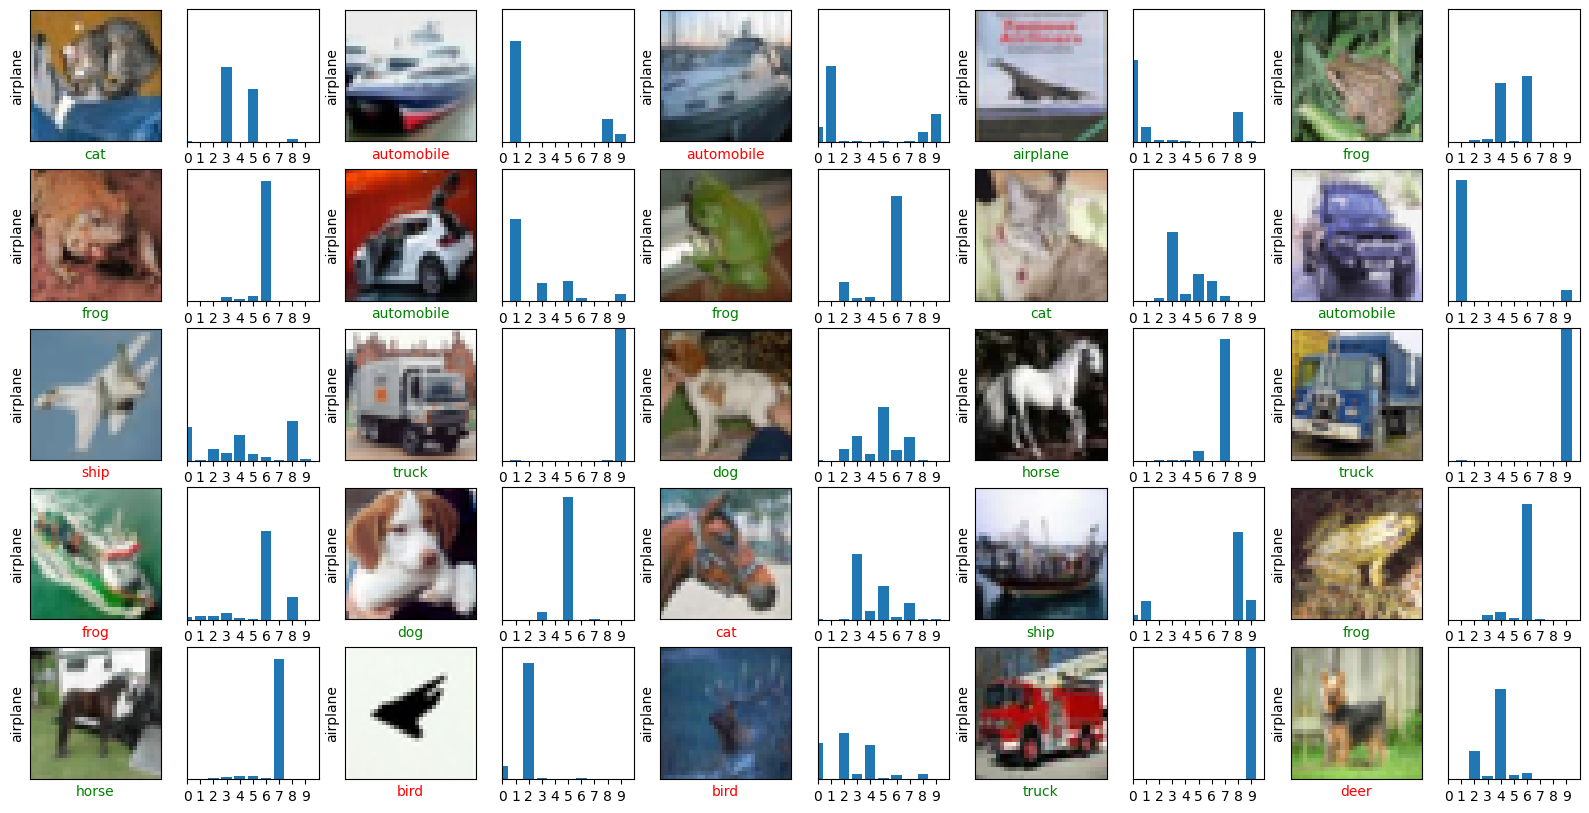

In [14]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[np.argmax(Y_train[i][0])])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()